# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Amazon) </font>

In [62]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'AMZN'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [63]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-20,2.978000,3.012000,2.946000,2.979500,2.979500,221722000
2003-10-21,2.986500,3.057500,2.950500,2.967500,2.967500,342298000
2003-10-22,2.802500,2.807500,2.686500,2.701500,2.701500,654038000
2003-10-23,2.649000,2.726000,2.645500,2.716000,2.716000,292234000
2003-10-24,2.727500,2.747000,2.650000,2.725500,2.725500,208764000
...,...,...,...,...,...,...
2023-10-13,132.979996,133.309998,128.949997,129.789993,129.789993,45786600
2023-10-16,130.690002,133.070007,130.429993,132.550003,132.550003,42832900
2023-10-17,130.389999,132.580002,128.710007,131.470001,131.470001,49344600


In [64]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2003-10-20 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [65]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [66]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,43.817159,44.333904,43.253151,43.802739,43.802739,1.128781e+08
std,52.845010,53.473046,52.150349,52.807387,52.807387,9.269353e+07
min,1.304500,1.315000,1.288000,1.303500,1.303500,1.762600e+07
25%,3.953500,4.039750,3.890000,3.957750,3.957750,6.215665e+07
50%,15.130000,15.253000,14.902000,15.120500,15.120500,9.065400e+07
75%,84.404999,85.369999,83.287498,84.461246,84.461246,1.356360e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [67]:
stock_data.shape
# kích thước dữ liệu

(5035, 6)

In [68]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [69]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

### Vẽ biểu đồ phân tích

1: Biểu đồ cột

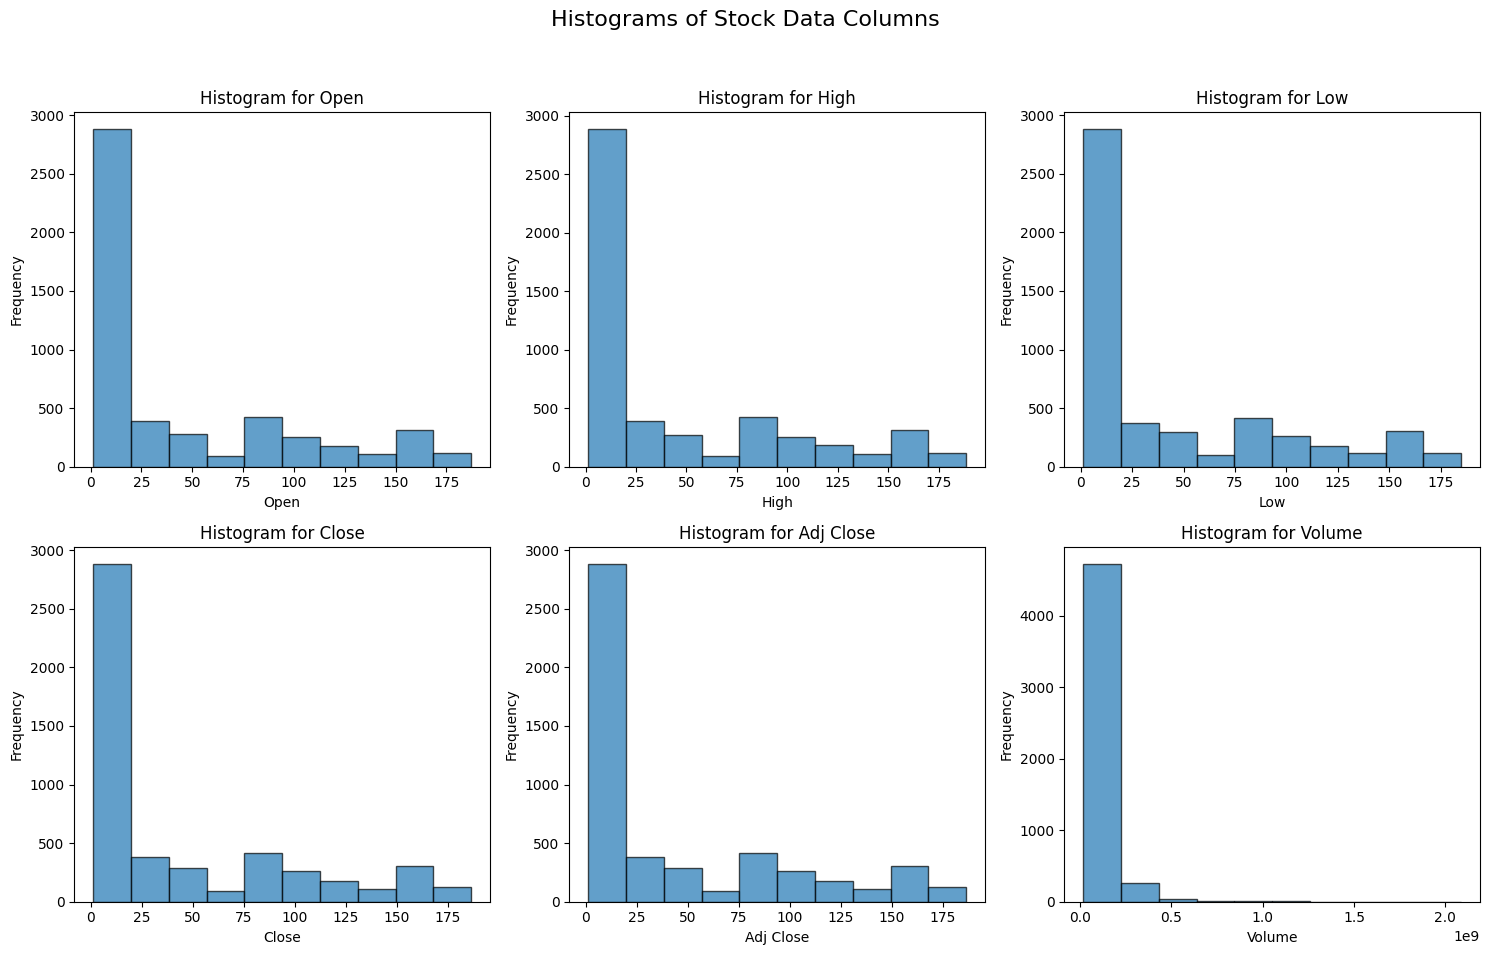

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Histograms of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ histogram
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].hist(stock_data[column], bins=10, edgecolor='k', alpha=0.7)
    axs[row, col].set_title(f'Histogram for {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ hộp

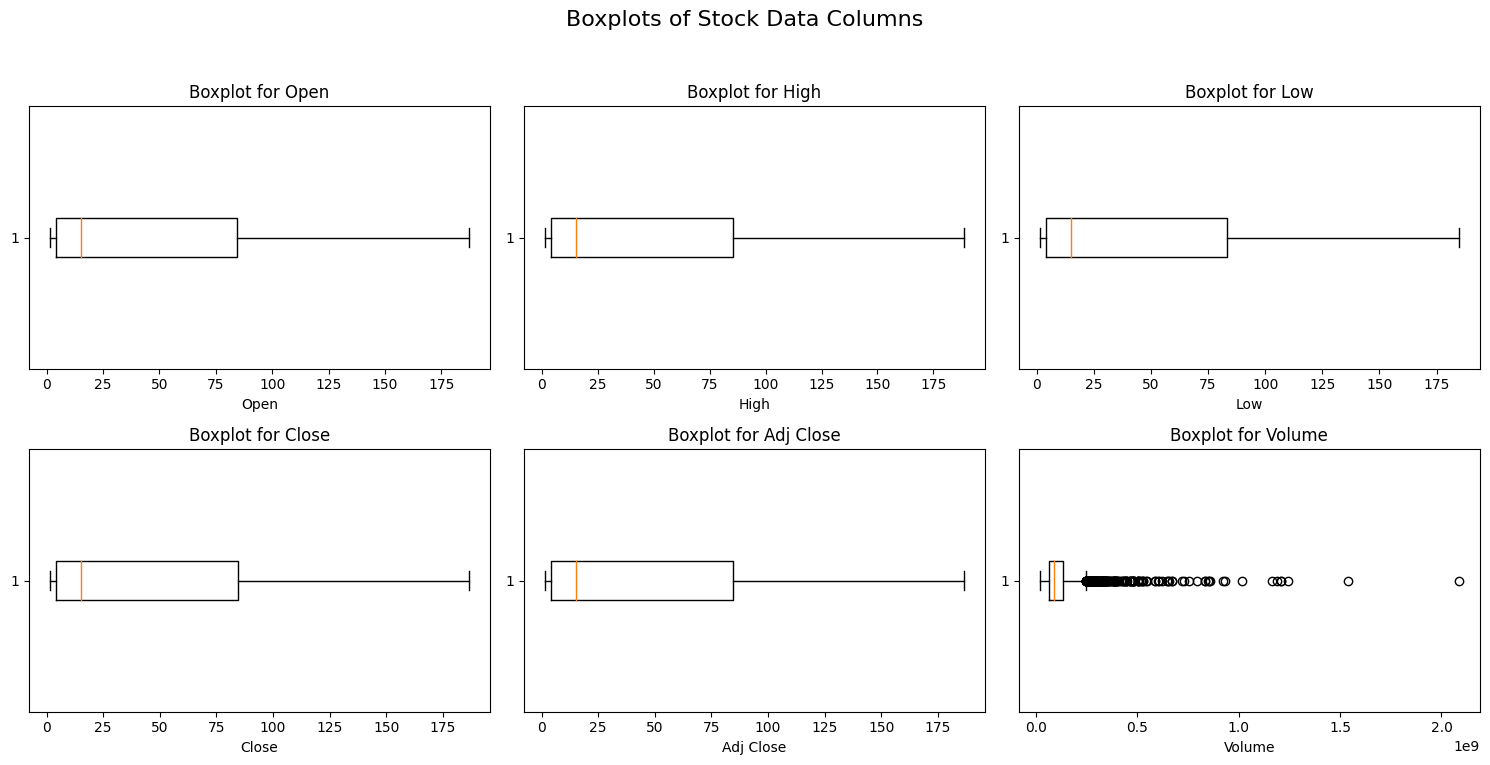

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Boxplots of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].boxplot(stock_data[column], vert=False)
    axs[row, col].set_title(f'Boxplot for {column}')
    axs[row, col].set_xlabel(column)

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ heatmap

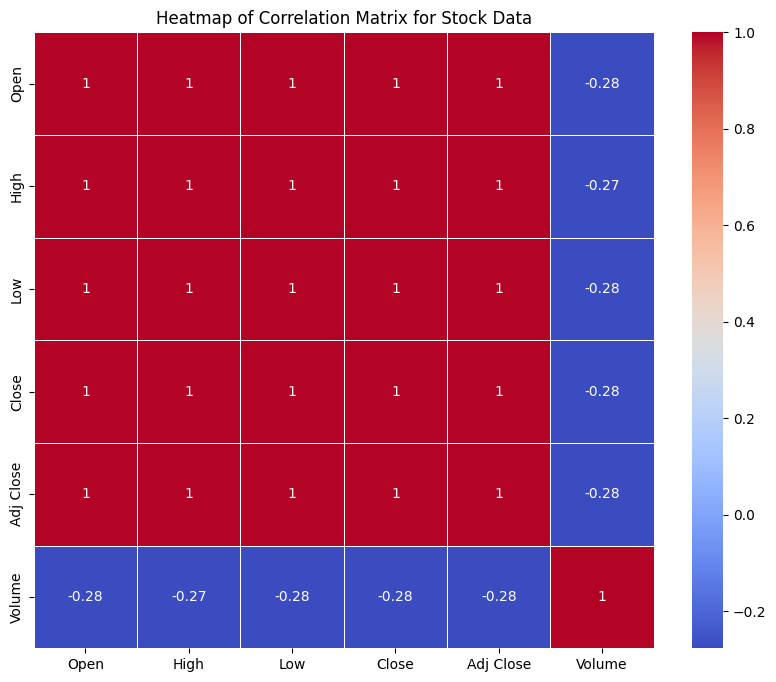

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()


Biểu đồ scatter thể hiện sự tuyến tính giữa từng cột với cột adj close

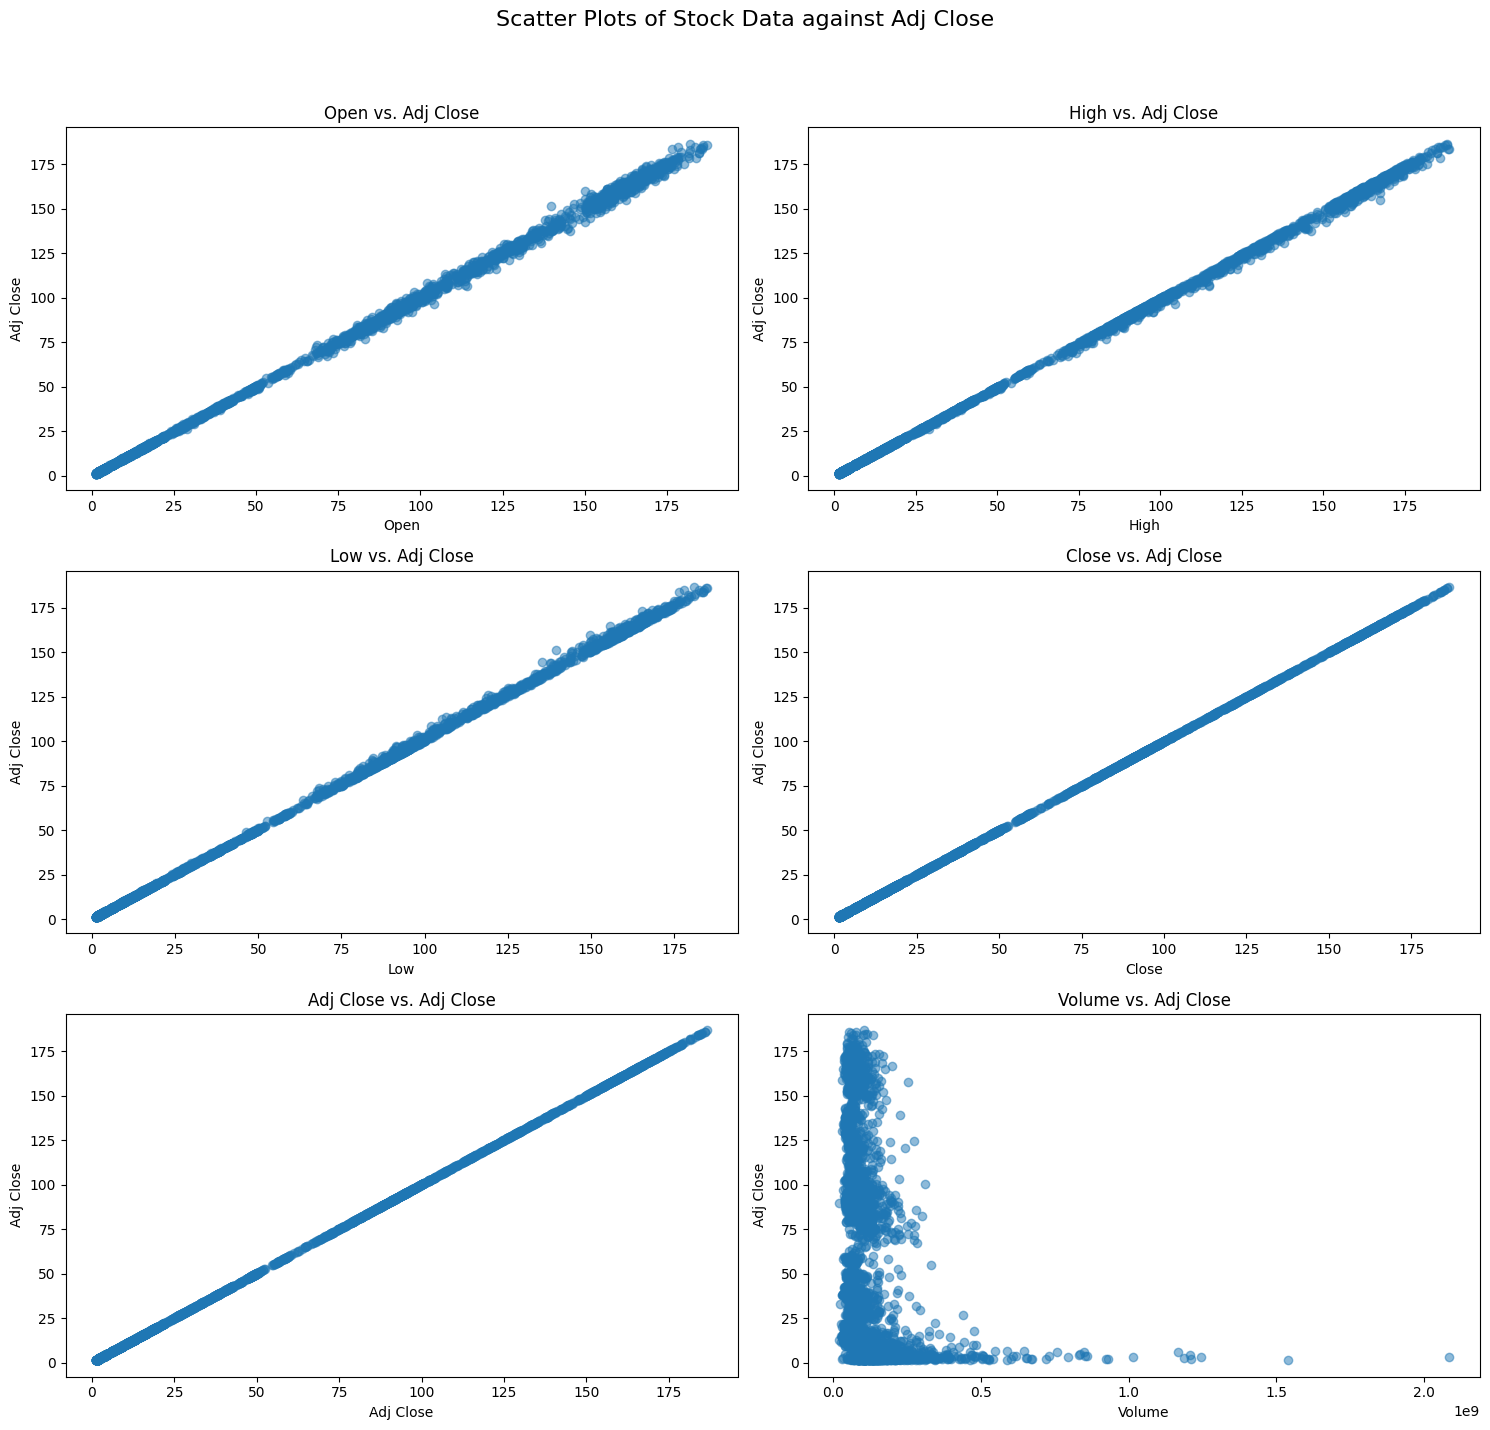

In [73]:

# Tính toán số lượng cột và số lượng hàng dựa vào số cột trong DataFrame
num_cols = len(stock_data.columns)
num_rows = (num_cols + 1) // 2  # Số hàng làm tròn lên nếu có số lẻ cột

# Tạo subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Stock Data against Adj Close', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ scatter
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 2)
    axs[row, col].scatter(stock_data[column], stock_data['Adj Close'], alpha=0.5)
    axs[row, col].set_title(f'{column} vs. Adj Close')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Adj Close')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### <font color = 'yellow' >Thông qua biểu đồ heatmap và biểu đồ scatter, ta thấy sự phụ thuộc tuyến tính giữa cột Adj close với các cột Open, hight, low, close. <br>Vì thế nên ta sẽ chia tập X, y như sau <font>

In [74]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2003-10-20      2.979500
2003-10-21      2.967500
2003-10-22      2.701500
2003-10-23      2.716000
2003-10-24      2.725500
                 ...    
2023-10-13    129.789993
2023-10-16    132.550003
2023-10-17    131.470001
2023-10-18    128.130005
2023-10-19    128.399994
Name: Adj Close, Length: 5035, dtype: float64

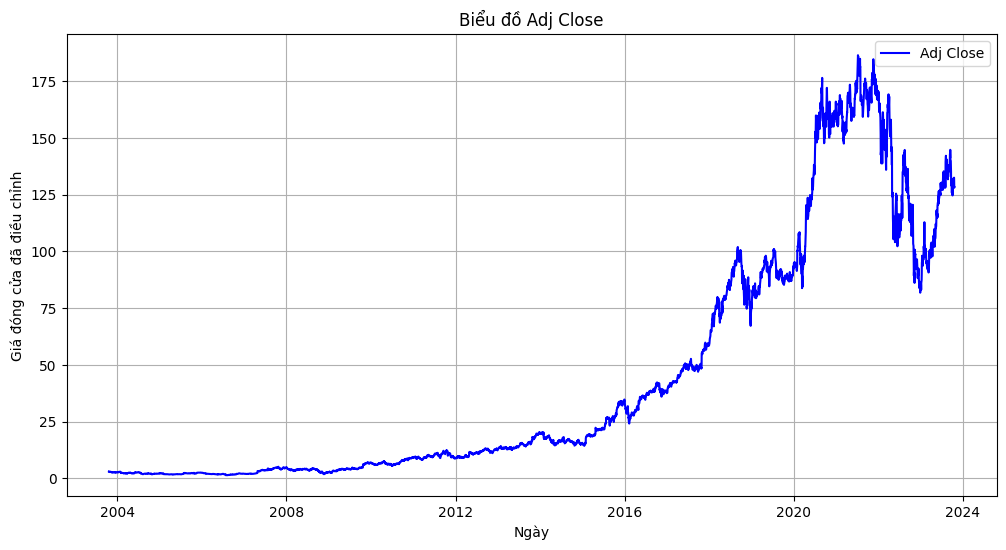

In [75]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Chọn các cột trừ cột 'Adj Close' và 'Volume làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close','Volume'])
X

,Open,High,Low,Close
Date,,,,
2003-10-20,2.978000,3.012000,2.946000,2.979500
2003-10-21,2.986500,3.057500,2.950500,2.967500
2003-10-22,2.802500,2.807500,2.686500,2.701500
2003-10-23,2.649000,2.726000,2.645500,2.716000
2003-10-24,2.727500,2.747000,2.650000,2.725500
...,...,...,...,...
2023-10-13,132.979996,133.309998,128.949997,129.789993
2023-10-16,130.690002,133.070007,130.429993,132.550003
2023-10-17,130.389999,132.580002,128.710007,131.470001


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

In [77]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(4028, 4)
(1007, 4)
(4028,)
(1007,)


In [79]:
X_train

,Open,High,Low,Close
Date,,,,
2016-05-09,33.697498,34.348999,33.570499,33.987499
2006-03-01,1.872500,1.884500,1.842500,1.856000
2016-01-06,31.100000,31.989500,31.015499,31.632500
2006-04-13,1.797500,1.836000,1.774500,1.831000
2005-08-03,2.300500,2.309000,2.292000,2.305500
...,...,...,...,...
2021-05-20,162.220001,162.983994,161.809006,162.384003
2005-08-25,2.127000,2.140000,2.104000,2.115500
2016-02-02,28.500000,28.577999,27.504499,27.605000


In [80]:
X_test

,Open,High,Low,Close
Date,,,,
2018-04-09,71.251503,71.924004,70.128502,70.304001
2022-06-09,119.989998,121.300003,116.099998,116.150002
2012-12-12,12.553500,12.718000,12.503000,12.588000
2020-08-31,170.449493,174.750000,170.250000,172.548004
2008-11-04,2.858000,2.936500,2.761000,2.922500
...,...,...,...,...
2013-10-22,16.386000,16.855499,16.284000,16.627001
2018-03-14,79.849998,80.321999,79.544502,79.550003
2005-08-22,2.180500,2.213500,2.147000,2.188500


In [81]:
y_train

Date
2016-05-09     33.987499
2006-03-01      1.856000
2016-01-06     31.632500
2006-04-13      1.831000
2005-08-03      2.305500
                 ...    
2021-05-20    162.384003
2005-08-25      2.115500
2016-02-02     27.605000
2018-10-12     89.430496
2007-03-22      1.974500
Name: Adj Close, Length: 4028, dtype: float64

In [82]:
y_test

Date
2018-04-09     70.304001
2022-06-09    116.150002
2012-12-12     12.588000
2020-08-31    172.548004
2008-11-04      2.922500
                 ...    
2013-10-22     16.627001
2018-03-14     79.550003
2005-08-22      2.188500
2023-05-08    105.830002
2008-10-31      2.862000
Name: Adj Close, Length: 1007, dtype: float64

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [83]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("../Scaler_data/Scaler_Amazon.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [84]:
X_train, X_train.shape

(array([[0.17425381, 0.17633273, 0.17587707, 0.17641566],
        [0.00305548, 0.00303994, 0.00302095, 0.00298218],
        [0.16028092, 0.16373792, 0.16195727, 0.16370428],
        ...,
        [0.14629456, 0.14552762, 0.14282913, 0.14196538],
        [0.47927735, 0.47578186, 0.46765353, 0.47567564],
        [0.00360149, 0.00358174, 0.0035821 , 0.0036218 ]]),
 (4028, 4))

In [85]:
X_test,X_test.shape

(array([[0.37627056, 0.37690497, 0.37504736, 0.37243817],
        [0.63845279, 0.64046994, 0.62550294, 0.61989725],
        [0.06051249, 0.06086827, 0.06110002, 0.06090939],
        ...,
        [0.00471233, 0.00479612, 0.00467989, 0.00477689],
        [0.55803127, 0.55933359, 0.56339502, 0.56419386],
        [0.00804753, 0.00826043, 0.00796779, 0.00841218]]),
 (1007, 4))

# <font color = 'red'>3:Huấn luyện mô hình<font>

In [86]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [88]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [89]:
y_pred.shape

(1007,)

In [90]:
y_test.shape

(1007,)

In [91]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 8.782362949103353e-29
R-squared (R2) Score: 1.0
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 8.905295650341657e-29
R-squared (R2) Score: 1.0


In [92]:
print(y_test)

Date
2018-04-09     70.304001
2022-06-09    116.150002
2012-12-12     12.588000
2020-08-31    172.548004
2008-11-04      2.922500
                 ...    
2013-10-22     16.627001
2018-03-14     79.550003
2005-08-22      2.188500
2023-05-08    105.830002
2008-10-31      2.862000
Name: Adj Close, Length: 1007, dtype: float64


In [93]:
print(y_pred)

[ 70.30400085 116.15000153  12.5880003  ...   2.18849993 105.83000183
   2.86199999]


In [94]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2018-04-09,70.304001,70.304001
2022-06-09,116.150002,116.150002
2012-12-12,12.588000,12.588000
2020-08-31,172.548004,172.548004
2008-11-04,2.922500,2.922500
2013-04-17,13.370000,13.370000
2004-10-04,2.050500,2.050500
2020-09-14,155.148499,155.148499
2020-04-17,118.750000,118.750000


<AxesSubplot:xlabel='Date'>

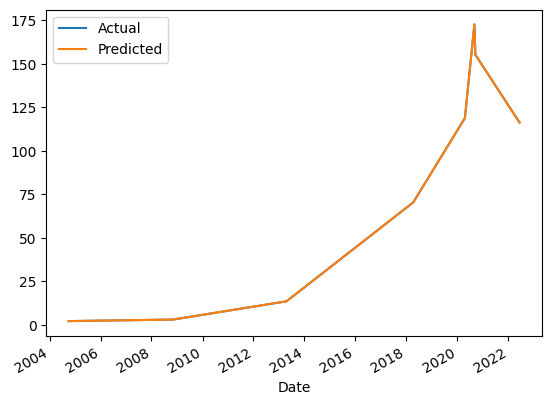

In [95]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [96]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Amazon.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)